<a href="https://colab.research.google.com/github/elmirakhavanin/Data-Science/blob/main/ML_Project_Elmirakhavaninzadeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 13HCHLcngJ1VtGQYKCxcCdcTIo-a8Pu1_
!gdown --id 1Csu2eM3mQEmej9lQXHKU62e9N9A7gRO5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13HCHLcngJ1VtGQYKCxcCdcTIo-a8Pu1_
To: /content/Test.csv
100% 528k/528k [00:00<00:00, 122MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Csu2eM3mQEmej9lQXHKU62e9N9A7gRO5
To: /content/Train.csv
100% 870k/870k [00:00<00:00, 90.3MB/s]


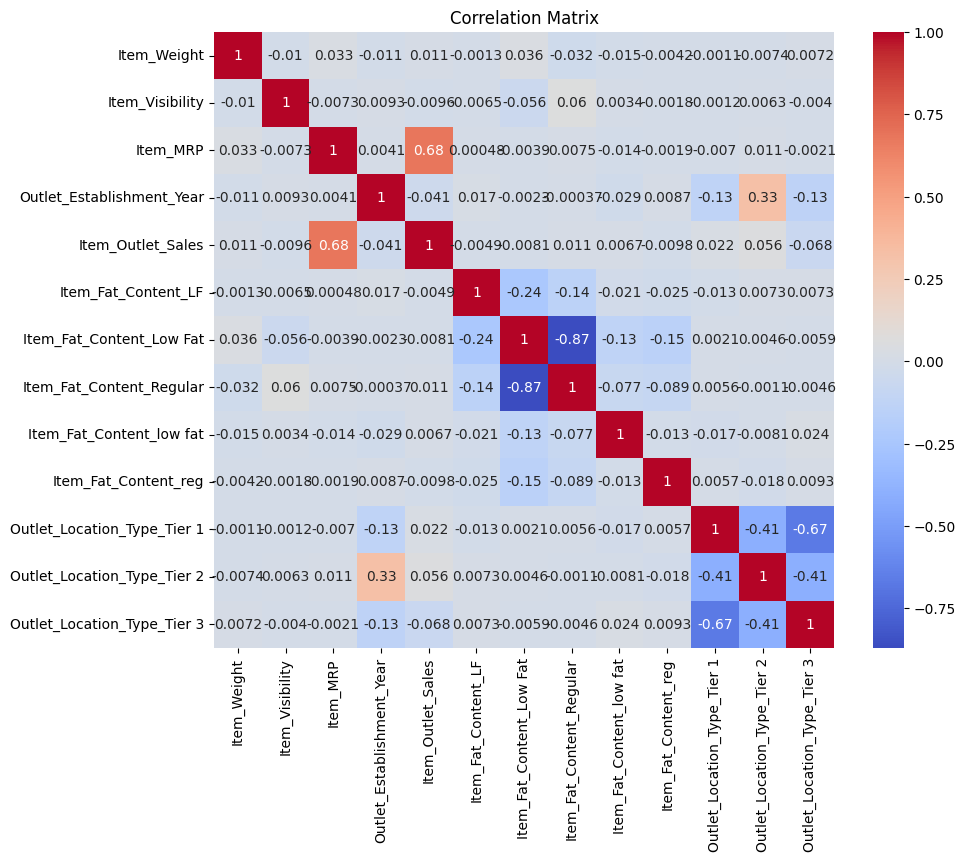

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Data Preprocessing
dataprime = pd.read_csv('Test.csv')
data=pd.read_csv('Train.csv')

# Handle missing values
# Replacing missing values with mean
data.dropna(subset=['Item_Weight', 'Outlet_Size'], inplace=True)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

# One-hot encode categorical variables
# Transforming Categorical variables to numerical data
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Location_Type'])

# Step 2 : Feature Selection
correlation_matrix = data.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()




In [ ]:
# Define features (X) and target variable (y)
# Prepration X and y for further analysis, preprocessing, and modeling
X = data.drop('Item_Outlet_Sales', axis=1)  # Features excluding the target
y = data['Item_Outlet_Sales']  # Target variable


In [ ]:
correlation_with_sales = correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False)
print(correlation_with_sales)

Item_Outlet_Sales              1.000000
Item_MRP                       0.679594
Outlet_Location_Type_Tier 2    0.055683
Outlet_Location_Type_Tier 1    0.022384
Item_Fat_Content_Regular       0.011480
Item_Weight                    0.010972
Item_Fat_Content_low fat       0.006656
Item_Fat_Content_LF           -0.004920
Item_Fat_Content_Low Fat      -0.008145
Item_Visibility               -0.009644
Item_Fat_Content_reg          -0.009805
Outlet_Establishment_Year     -0.040869
Outlet_Location_Type_Tier 3   -0.067849
Name: Item_Outlet_Sales, dtype: float64


In [ ]:
# Define the correlation threshold
correlation_threshold = 0.01

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract correlations with the target variable
correlation_with_sales = correlation_matrix['Item_Outlet_Sales']

# Select features that pass the correlation threshold
selected_features = correlation_with_sales[abs(correlation_with_sales) >= correlation_threshold].index

# Create a new DataFrame with selected features
selected_data = data[selected_features]

# Now selected_data contains only the relevant features


Linear Regression:
Mean Squared Error: 1792159.8003129025
R-squared: 0.34062563001521606

Decision Tree:
Mean Squared Error: 3492020.9673204194
R-squared: -0.28479007558284875

Random Forest:
Mean Squared Error: 2040224.398906419
R-squared: 0.24935729647455174

Gradient Boosting:
Mean Squared Error: 1767773.4470163465
R-squared: 0.34959789707440103



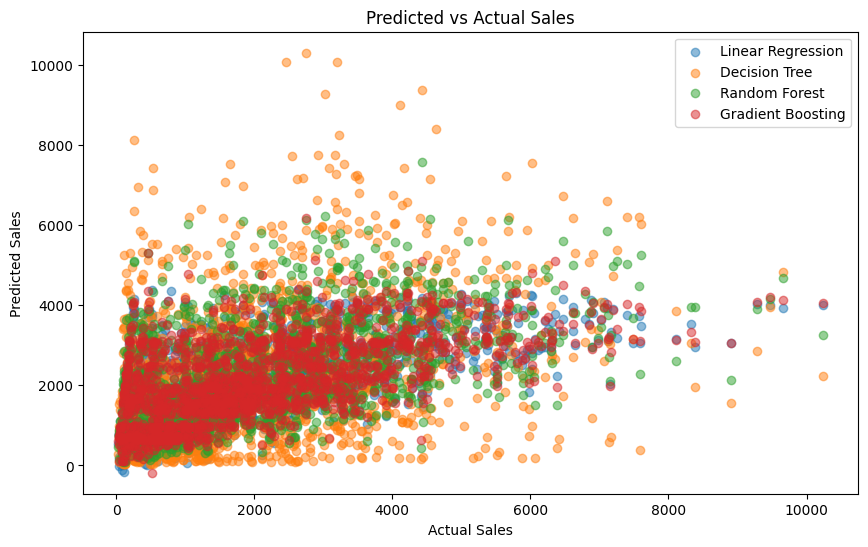

In [ ]:
# Step 3 : Model Selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features (X) and target variable (y)
X = selected_data.drop('Item_Outlet_Sales', axis=1)
y = selected_data['Item_Outlet_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Display results
for model_name, metrics in results.items():
    print(f'{model_name}:')
    print(f'Mean Squared Error: {metrics["MSE"]}')
    print(f'R-squared: {metrics["R2"]}\n')

# Visualization of predictions
plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.legend()
plt.show()

# Based on R2 and MSE "Gradient Boosting" is the best model.

In [ ]:
# Step 5: Cross Validation (Hyperparameter Tuning)
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    cv_results[model_name] = rmse_scores.mean()

# Step 6: Interpretation and Insight
# Compare results, visualize, and write a report
print("Model Evaluation Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")

print("\nCross Validation Results:")
for model_name, cv_score in cv_results.items():
    print(f"{model_name}: RMSE = {cv_score}")

Model Evaluation Results:
Linear Regression: MSE = 1792159.8003129025, R2 = 0.34062563001521606
Decision Tree: MSE = 3492020.9673204194, R2 = -0.28479007558284875
Random Forest: MSE = 2040224.398906419, R2 = 0.24935729647455174
Gradient Boosting: MSE = 1767773.4470163465, R2 = 0.34959789707440103

Cross Validation Results:
Linear Regression: RMSE = 1388.0051815682702
Decision Tree: RMSE = 1889.448258363143
Random Forest: RMSE = 1490.284427426855
Gradient Boosting: RMSE = 1381.2549494268894


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)
# Make predictions using the trained model
y_pred = gb_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')




Mean Squared Error: 1767773.4470163465
R-squared: 0.34959789707440103


In [ ]:

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = gb_model.predict(X_test)

print("Actual Sales:", y_test.tolist())
print("Predicted Sales:", y_pred.tolist())

Actual Sales: [1743.0644, 356.8688, 377.5086, 5778.4782, 2356.932, 865.54, 4613.994, 2410.8618, 1948.1308, 1937.478, 210.3928, 255.0014, 4541.4218, 657.8104, 578.5802, 4229.1616, 1267.0174, 2388.8904, 1797.66, 4447.544, 2570.6538, 1779.6834, 4211.185, 3912.2408, 2366.919, 1298.31, 149.805, 3916.2356, 2065.3116, 3029.39, 788.3072, 2566.659, 575.2512, 1464.76, 617.8624, 792.302, 505.3422, 1470.0864, 467.3916, 551.2824, 154.4656, 885.514, 633.8416, 1783.6782, 2603.278, 605.878, 848.895, 447.4176, 3315.0182, 4264.449, 934.7832, 3178.5292, 718.3982, 311.5944, 579.246, 1506.0396, 978.726, 1038.648, 701.7532, 2614.5966, 552.614, 170.4448, 1366.2216, 241.6854, 2396.88, 2652.5472, 830.9184, 4950.8888, 771.6622, 2636.568, 1347.5792, 150.4708, 4566.0564, 1311.626, 1508.037, 1335.5948, 1901.5248, 2174.5028, 1379.5376, 2141.2128, 552.614, 3266.4148, 3920.2304, 3020.0688, 3896.2616, 3877.6192, 5321.0736, 1416.8224, 2752.4172, 4036.7454, 1547.3192, 1406.1696, 1194.4452, 1895.5326, 1062.6168, 1166.481

--2023-08-22 15:26:58--  https://github.com/elmirakhavanin/ML.git
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/elmirakhavanin/ML [following]
--2023-08-22 15:26:58--  https://github.com/elmirakhavanin/ML
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ML.git’

ML.git                  [ <=>                ] 107.29K  --.-KB/s    in 0.04s   

2023-08-22 15:26:59 (2.76 MB/s) - ‘ML.git’ saved [109868]

